In [64]:
import numpy as np
import pandas as pd
import seaborn as sns

In [65]:
data = pd.read_csv("kindey stone urine analysis.csv")
data.head()

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0


<AxesSubplot:>

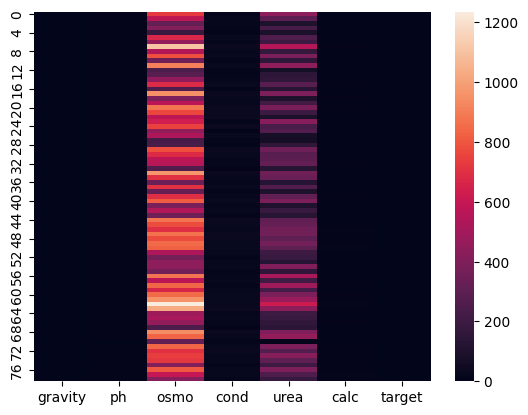

In [66]:
sns.heatmap(data)

In [67]:
data.head()

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0


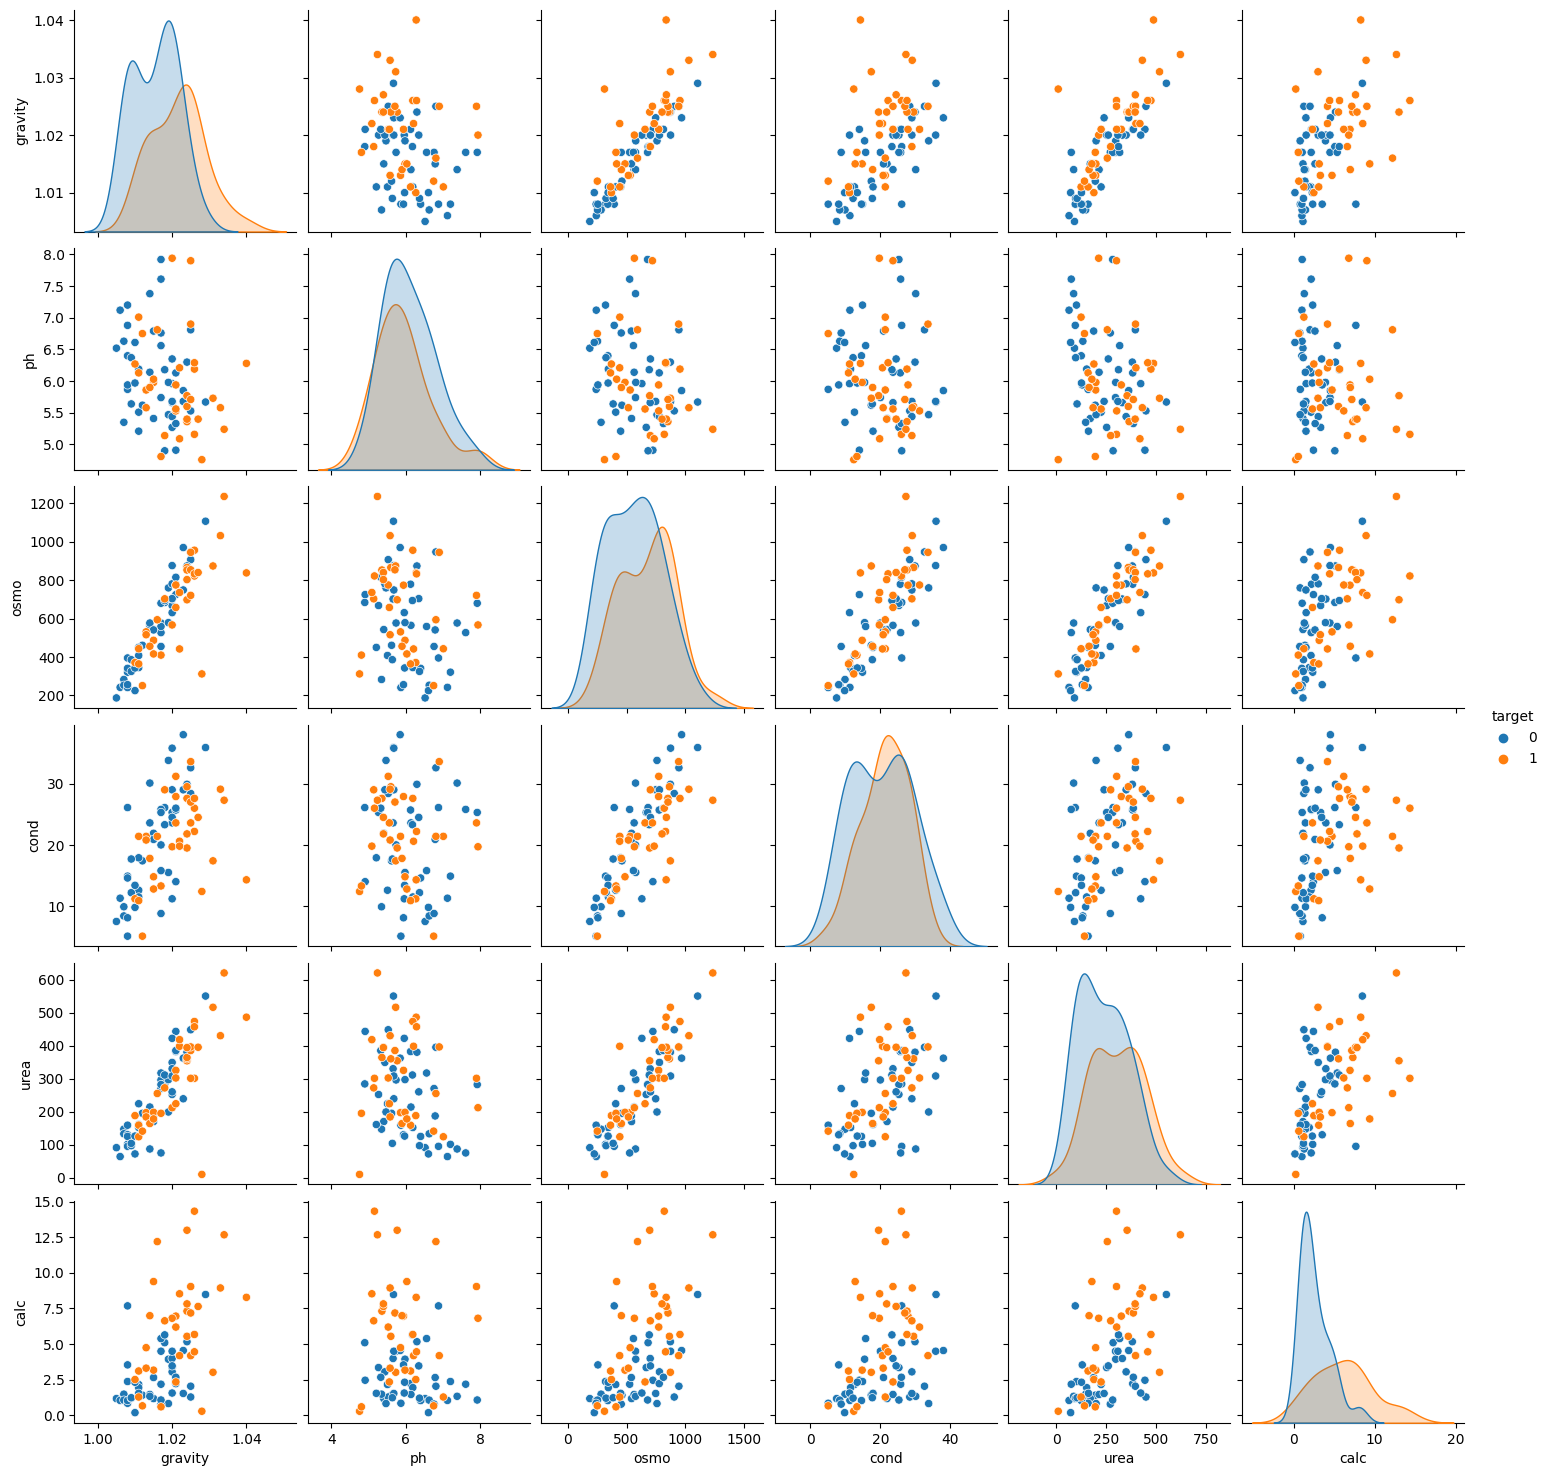

In [68]:
sns.pairplot(data,hue="target")

In [69]:
x = data.drop(columns=['target'])
y = data['target']

In [70]:
x.head()

,gravity,ph,osmo,cond,urea,calc
0,1.021,4.91,725,14.0,443,2.45
1,1.017,5.74,577,20.0,296,4.49
2,1.008,7.20,321,14.9,101,2.36
3,1.011,5.51,408,12.6,224,2.15
4,1.005,6.52,187,7.5,91,1.16


In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [73]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [74]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [140]:
model= Sequential()

model.add(Dense(40,activation='relu',input_dim=6))
model.add(Dense(20,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(1,activation='sigmoid'))  

In [141]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 40)                280       
                                                                 
 dense_29 (Dense)            (None, 20)                820       
                                                                 
 dense_30 (Dense)            (None, 12)                252       
                                                                 
 dense_31 (Dense)            (None, 1)                 13        
                                                                 
Total params: 1,365
Trainable params: 1,365
Non-trainable params: 0
_________________________________________________________________


In [142]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [143]:
history = model.fit(x_train_scaled,y_train,epochs=30,validation_split=0.5)

Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 0.6656 - accuracy: 0.6452 - val_loss: 0.6912 - val_accuracy: 0.4375
Epoch 2/30
1/1 [==============================] - 0s 59ms/step - loss: 0.6595 - accuracy: 0.7097 - val_loss: 0.6886 - val_accuracy: 0.5625
Epoch 3/30
1/1 [==============================] - 0s 79ms/step - loss: 0.6537 - accuracy: 0.7097 - val_loss: 0.6862 - val_accuracy: 0.5938
Epoch 4/30
1/1 [==============================] - 0s 52ms/step - loss: 0.6479 - accuracy: 0.7419 - val_loss: 0.6840 - val_accuracy: 0.5625
Epoch 5/30
1/1 [==============================] - 0s 89ms/step - loss: 0.6428 - accuracy: 0.7742 - val_loss: 0.6820 - val_accuracy: 0.5625
Epoch 6/30
1/1 [==============================] - 0s 67ms/step - loss: 0.6378 - accuracy: 0.7742 - val_loss: 0.6799 - val_accuracy: 0.5625
Epoch 7/30
1/1 [==============================] - 0s 75ms/step - loss: 0.6330 - accuracy: 0.8065 - val_loss: 0.6777 - val_accuracy: 0.6250
Epoch 8/30
1/1 [=============

In [144]:
log_y = model.predict(x_test_scaled)

1/1 [==============================] - 0s 70ms/step


In [145]:
log_y

array([[0.6224882 ],
       [0.35892335],
       [0.46673453],
       [0.49223995],
       [0.6470783 ],
       [0.39293835],
       [0.3697106 ],
       [0.55453724],
       [0.45980397],
       [0.5591763 ],
       [0.33978355],
       [0.7784499 ],
       [0.3586689 ],
       [0.32182363],
       [0.684879  ],
       [0.38436964]], dtype=float32)

In [146]:
y_pred = np.where(log_y>0.5,1,0)

In [147]:
y_pred

array([[1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0]])

In [148]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8125

In [149]:
import matplotlib.pyplot as plt

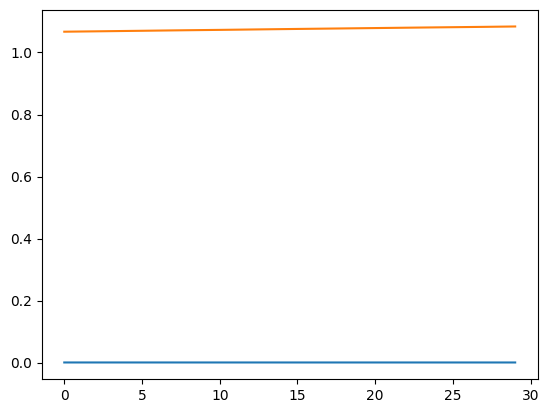

In [109]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [110]:
def tell_key(v):
    k = list(c.values()).index(v)
    return list(c.keys())[k]

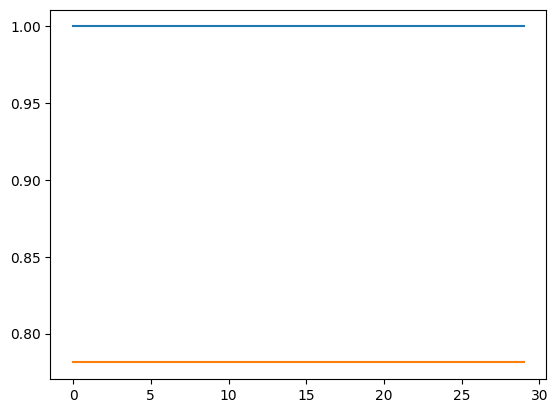

In [111]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [112]:
number = model.predict(x_test_scaled[[0]])

1/1 [==============================] - 0s 148ms/step


In [113]:
number = np.where(number>0.5,1,0)

In [114]:
number

array([[1]])

In [115]:
y_test[0]

1